In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import files
Uploaded = files.upload()

Saving spam.csv to spam.csv


In [3]:
df = pd.read_csv("spam.csv", encoding='latin')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:

df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].astype(str).str.strip().str.lower()
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
print(df['label'].value_counts())

label
0    4825
1     747
Name: count, dtype: int64


In [7]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.isnull().sum()

,0
label,0
message,0


In [18]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # 3. Tokenize (split into words)
    words = text.split()

    # 4. Remove stopwords + short junk
    cleaned = [word for word in words if word not in stop_words and len(word) > 2]

    return ' '.join(cleaned)

# ✅ Apply it
df['cleaned_message'] = df['message'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
print(stop_words)

{"i'd", "i'm", "didn't", "he'd", 'each', "aren't", "you're", 'i', "he'll", 'below', 'am', 'down', 'theirs', 'but', 'herself', "shan't", "you've", 'on', 'yourselves', 'against', 'himself', 'won', 'most', 'not', 'them', 'about', 'ain', 'our', 'any', 'mustn', "it'd", 're', 'above', 'needn', 'why', 'did', 'such', 'the', 'up', 'whom', 's', 'how', 'from', 't', "we'd", "won't", 'ma', 'until', 'itself', 'where', 'had', 'during', 'you', "wouldn't", 'weren', "needn't", 'y', 'through', "we've", 'he', 'after', 'all', "you'll", 'at', "weren't", "i'll", "we'll", 'wouldn', 'a', 'has', 'now', 'for', "they're", "don't", 'between', 'here', 'once', "hadn't", "you'd", 'didn', 'it', 'shan', 'when', "they'll", 'aren', 'me', 'before', 'my', 'd', 'wasn', 'ours', 'yours', 'mightn', 'so', "that'll", 'm', 'off', "it'll", 'of', "she's", 'an', 'or', 'ourselves', 'nor', 'should', 'while', 'hers', 'with', 'hasn', 'isn', 'your', 'by', 'themselves', "isn't", 'who', 'and', 'having', 'in', "haven't", "she'll", 'further'

In [19]:
df[['message','cleaned_message']].head(6)

,message,cleaned_message
0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,Ok lar... Joking wif u oni...,lar joking wif oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts 21st m...
3,U dun say so early hor... U c already then say...,dun say early hor already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
5,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling weeks word back like fun s...


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['cleaned_message'])
Y = df['label']

In [23]:
print(X.shape)
print(Y.shape)

(5572, 9135)
(5572,)


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11 )
print(X_train.shape)
print(Y_train.shape)

(4457, 9135)
(4457,)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

Accuracy = accuracy_score(Y_test, Y_pred)
print("accuracy:", Accuracy)

Class_Report = classification_report(Y_test, Y_pred)
print("classification report:", Class_Report)

accuracy: 0.9587443946188341
classification report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       982
           1       0.96      0.68      0.80       133

    accuracy                           0.96      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.96      0.96      1115



In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[978   4]
 [ 42  91]]


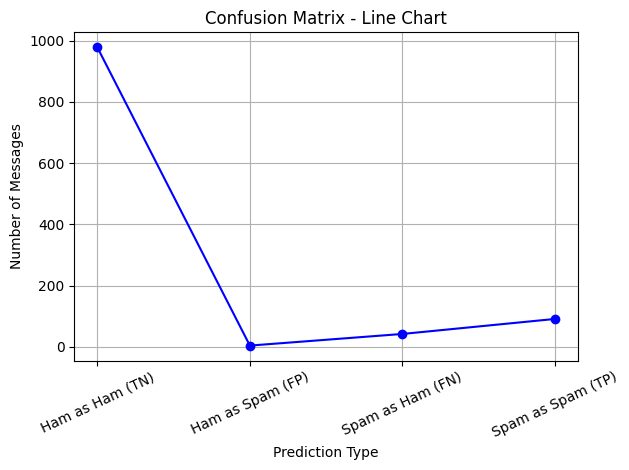

In [52]:

# Labels and values
labels = ['Ham as Ham (TN)', 'Ham as Spam (FP)', 'Spam as Ham (FN)', 'Spam as Spam (TP)']
values = [tn, fp, fn, tp]

# Plot
plt.plot(labels, values, marker='o', color='blue')
plt.title("Confusion Matrix - Line Chart")
plt.xlabel("Prediction Type")
plt.ylabel("Number of Messages")
plt.grid(True)
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()